## Problem Statement
### Prediciting the Optimal number of clusters using KMeans Clustering

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns`
from sklearn.cluster import KMeans

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8]

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
## Selecting only the features as it is an unsupervised problem

X = df.iloc[:,:-1]

In [5]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


Now finding the optimal Number of clusters using 'The Elbow Method'

In [6]:
wcv = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcv.append(km.inertia_)

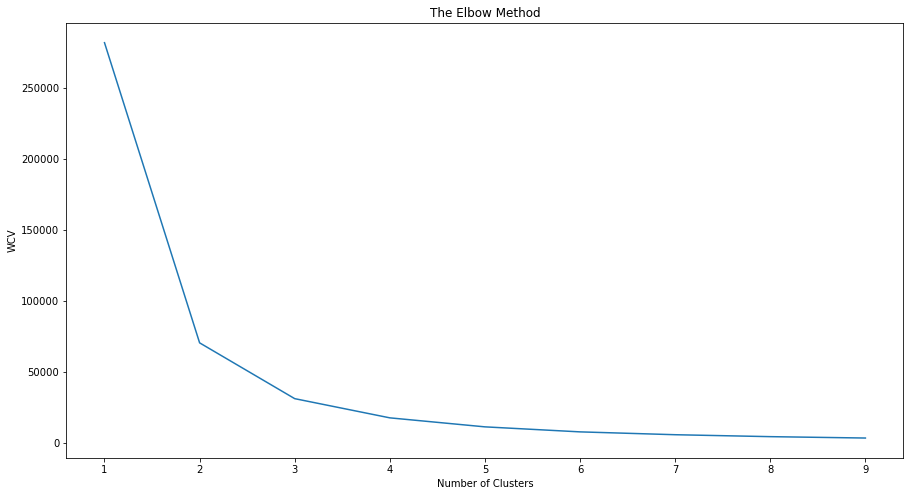

In [7]:
plt.plot(range(1,10),wcv)
plt.xlabel("Number of Clusters")
plt.ylabel("WCV")
plt.title("The Elbow Method")
plt.show()

As you can see from the above graph, the optimal clusters is where the elbow occurs. 

We will select optimal cluster as '3'.

### Applying K-Means Algorithm

In [8]:
X = np.array(X)

In [9]:
km = KMeans(n_clusters=3)

In [10]:
y_pred = km.fit_predict(X)

### Visualising the Clusters

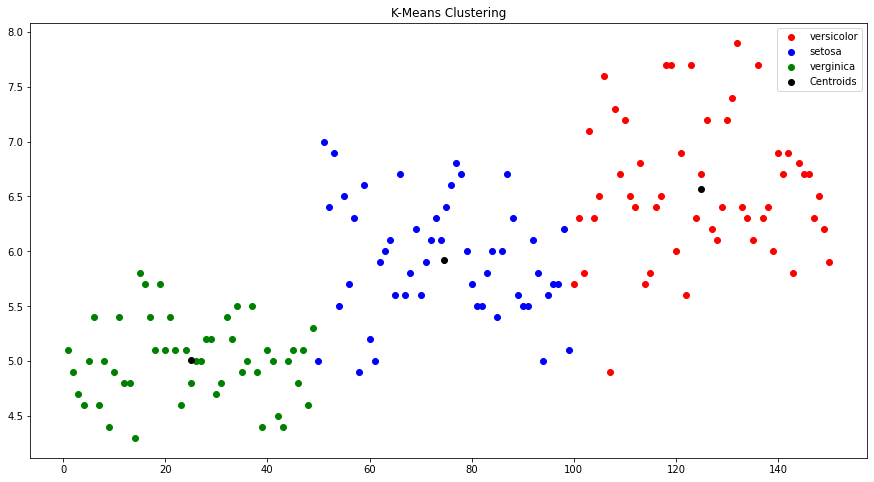

In [11]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c = 'r', label = 'versicolor')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c = 'b', label = 'setosa')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], c = 'g', label = 'verginica')

## Plotting the Centroids of each cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In this graph we can see that the 3 clusters are plotted for the dataset with the Centroids.